In [0]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid', {'axes.grid':False})
sns.set_context('notebook')

np.random.seed(42)

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('Arquivo "{name}" importado pelo usuário com tamanho de {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving base_agrupamento_1.csv to base_agrupamento_1.csv
Arquivo "base_agrupamento_1.csv" importado pelo usuário com tamanho de 13427 bytes


In [0]:
baseDados = pd.read_csv('base_agrupamento_1.csv')

x = baseDados[['X', 'Y']]

K_min = 2
K_max = 30

Text(4, 0.7709092776823179, 'Melhor K: 3')

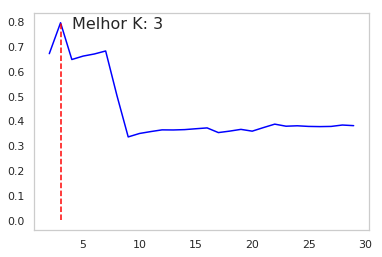

In [10]:
K = list(range(K_min, K_max))
sil = []

for i in range(K_min, K_max):
  km = KMeans(n_clusters = i)
  labels = km.fit_predict(x)
  sil.append(silhouette_score(x, labels))
  
plt.plot(K, sil, color='blue')
idx = np.argmax(sil)
plt.plot([K[idx], K[idx]], [0, sil[idx]], '--', color='red')
plt.text(K[idx]+1, sil[idx]-0.025, 'Melhor K: %d' % K[idx], fontdict={'fontsize':16})